In [12]:
import pandas as pd

df=pd.read_csv('Threshold_Value_14/overall_performance_threshold_14.csv')

magnitude=df['magnitude']


In [18]:
df.shape

(1336, 12)

In [121]:
threshold_value=14

classification_list=[]

for iteration in magnitude:
    value=int(iteration)
    if value<=threshold_value:
        label='gazing'
        classification_list.append(label)
    else:
        label='gazing else where'
        classification_list.append(label)

In [122]:
df['predicted_label_14']=classification_list

In [123]:
df.head()

,Unnamed: 0,file_name,pitch,roll,yaw,eye_pitch,eye_yaw,magnitude,label,predicted_label,...,predicted_label_15,predicted_label_16,predicted_label_12,predicted_label_11,predicted_label_10,predicted_label_17,predicted_label_18,predicted_label_9,predicted_label_8,predicted_label_14
0,0,0.jpg,0.053992,-0.998096,-3.131119,-11.595399,1.176419,6,head_straight_eye_straight,gazing,...,gazing,gazing,gazing,gazing,gazing,gazing,gazing,gazing,gazing,gazing
1,1,1.jpg,0.199837,-0.842060,-3.643689,-6.869514,6.450513,5,head_straight_eye_straight,gazing,...,gazing,gazing,gazing,gazing,gazing,gazing,gazing,gazing,gazing,gazing
2,2,2.jpg,0.199837,-0.842060,-3.643689,-6.869514,6.450513,5,head_straight_eye_straight,gazing,...,gazing,gazing,gazing,gazing,gazing,gazing,gazing,gazing,gazing,gazing
3,3,3.jpg,0.036036,-0.710877,-3.018157,-8.081615,5.993821,6,head_straight_eye_straight,gazing,...,gazing,gazing,gazing,gazing,gazing,gazing,gazing,gazing,gazing,gazing
4,4,4.jpg,0.036036,-0.710877,-3.018157,-8.081615,5.993821,6,head_straight_eye_straight,gazing,...,gazing,gazing,gazing,gazing,gazing,gazing,gazing,gazing,gazing,gazing


In [49]:
df.to_csv('overall_performance.csv',index=True,header=True)

In [124]:
df.columns

Index(['Unnamed: 0', 'file_name', 'pitch', 'roll', 'yaw', 'eye_pitch',
       'eye_yaw', 'magnitude', 'label', 'predicted_label', 'actual_label',
       'predicted_label_13', 'predicted_label_15', 'predicted_label_16',
       'predicted_label_12', 'predicted_label_11', 'predicted_label_10',
       'predicted_label_17', 'predicted_label_18', 'predicted_label_9',
       'predicted_label_8', 'predicted_label_14'],
      dtype='object')

In [125]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

actual_label=df['actual_label']
predicted_label=df['predicted_label_14']

In [126]:
print(classification_report(actual_label, predicted_label))

                   precision    recall  f1-score   support

           gazing       0.50      0.98      0.67       275
gazing else where       0.99      0.75      0.85      1061

         accuracy                           0.80      1336
        macro avg       0.75      0.86      0.76      1336
     weighted avg       0.89      0.80      0.82      1336



In [128]:
labels=list(df['actual_label'].unique())
cm=confusion_matrix(actual_label, predicted_label,labels=labels) 

# Notes
# [0,0]--> TN 
# [1,1]--> TP 
# [1,0] --> FN,  
# [0,1] --> FP

TP=cm[1][1]
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]

print('-----'*10)
print('Your TP Value:--->',TP)
print('Your TN Value:--->',TN)
print('Your FP Value:--->',FP)
print('Your FN Value:--->',FN)
print('-----'*10)

accuracy=(TP+TN)/(TP+FP+TN+FN)
precision=(TP)/(TP+FP)
recall=(TP)/(TP+FN)
f1_score=(2)* (precision*recall)/(precision+recall)

print('-----'*10)
print('Your accuracy:-->',accuracy)
print('Your precision:-->',precision)
print('Your recall:-->',recall)
print('Your f1_score:-->',f1_score)
print('-----'*10)

--------------------------------------------------
Your TP Value:---> 796
Your TN Value:---> 269
Your FP Value:---> 6
Your FN Value:---> 265
--------------------------------------------------
--------------------------------------------------
Your accuracy:--> 0.7971556886227545
Your precision:--> 0.9925187032418953
Your recall:--> 0.7502356267672008
Your f1_score:--> 0.8545356951154053
--------------------------------------------------


In [64]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

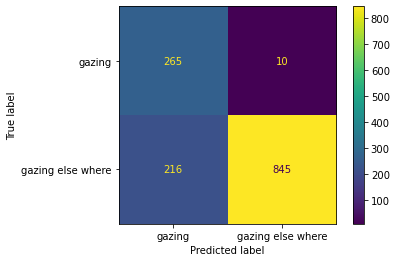

In [65]:
disp.plot()

In [50]:
df.columns

Index(['Unnamed: 0', 'file_name', 'pitch', 'roll', 'yaw', 'eye_pitch',
       'eye_yaw', 'magnitude', 'label', 'predicted_label', 'actual_label',
       'predicted_label_13', 'predicted_label_15', 'predicted_label_16',
       'predicted_label_12', 'predicted_label_11', 'predicted_label_10',
       'predicted_label_17', 'predicted_label_18', 'predicted_label_9',
       'predicted_label_8'],
      dtype='object')

In [ ]:
# Classification

In [6]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

df=pd.read_csv('frame_by_frame_dataset.csv')
df_copy=df.copy()


#Create x and y variable
x = df_copy.drop(columns=['actual_label'])
y = df_copy['actual_label']



In [25]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pickle


# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
			x, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
predicted_output=(knn.predict(X_test))

single_prediction=np.array([[-2.11,1.20,1.55,10.98,19.09]])

predicted_output=(knn.predict(single_prediction))

# save the model
filename = 'linear_model.sav'
pickle.dump(knn, open(filename, 'wb'))

load_model = pickle.load(open(filename, 'rb'))
  
y_pred = load_model.predict(single_prediction)
print(y_pred)

['gazing_else_where']


C:\Program Files\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Program Files\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [26]:
X_test

,pitch,roll,yaw,eye_pitch,eye_yaw
486,2.937847,-3.299211,12.442754,-10.055530,29.227477
73,2.213452,-6.074842,32.815662,-7.050963,-31.097628
349,5.266354,-2.294877,0.952565,-6.377545,19.228224
86,2.676622,-5.855970,33.260006,-7.498957,-32.814051
457,4.791079,-0.895088,-17.439029,9.700828,6.252803
...,...,...,...,...,...
93,4.535101,5.148170,-32.919361,-11.489904,12.373679
325,3.349794,-2.975822,-3.600070,15.602733,-13.589734
180,-14.602468,2.069345,0.001391,-10.055247,5.331565
331,3.960473,-2.899172,-3.246609,3.634589,20.054878


In [23]:
predicted_output

array(['gazing_else_where'], dtype=object)

In [14]:
# cm=confusion_matrix(y_test, predicted_output) 

# TP=cm[1][1]
# TN=cm[0][0]
# FP=cm[0][1]
# FN=cm[1][0]

# print('-----'*10)
# print('Your TP Value:--->',TP)
# print('Your TN Value:--->',TN)
# print('Your FP Value:--->',FP)
# print('Your FN Value:--->',FN)
# print('-----'*10)

# accuracy=(TP+TN)/(TP+FP+TN+FN)
# precision=(TP)/(TP+FP)
# recall=(TP)/(TP+FN)
# f1_score=(2)* (precision*recall)/(precision+recall)

# print('-----'*10)
# print('Your accuracy:-->',accuracy)
# print('Your precision:-->',precision)
# print('Your recall:-->',recall)
# print('Your f1_score:-->',f1_score)
# print('-----'*10)